# Training of a neural network

This lecture is quite unusual because it contains only practical part. On the previous lecture, we talked about the theory behind feedforward neural networks, their structure, and the algorithm called backpropagation. During this lecture, we are going to improve Python implementation of a neural network, which was forged at the previous lecture.

## Basic techniques

First of all, we are going to import class NeuralNet, which was written at the previous lecture, using following structure (library itself is stored in github folder "Modules").

In [1]:
import neural_net_lib as net

Then we are going to import all needed libraries for this part of the lecture. They are divided into two categories: crucial and cosmetic, which are needed for simplification of code or visualization:

In [3]:
#crucial
import random
import pickle
#cosmetic
import numpy as np
import matplotlib.pyplot as plt
import time

### Data

After importing libraries, we are defining the main task - classification of numbers by their look. In other words, we have an image of a number (28x28) and a neural network has to answer which number it is. Hardcoding rules manually using if-statements is an extraordinarily hard task, if not impossible. That is why we are going to use a flexible neural network to do this work for us.

As we have learned in the previous lecture, a neural network needs to have examples to learn on. During this lecture, we are going to use MNIST database which main part consists of 55000 images and, accordingly, labels (numbers from 0 to 9). This database can be easily uploaded using library Tensorflow:

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Object mnist contains all images in mnist.train.images and all labels in mnist.train.labels. Each image can be accessed using an index. For example mnist.train.images[i], where i is from 0 to 54999, is an array of numbers with length 784 (28x28=784).

All labels are represented as *one-hot vectors*, which means that each label is a list of zeros with an exception of one position, which is equal to one. For example 2 can be encoded as [0,0,1,0,0,0,0,0,0,0]

In [8]:
print(mnist.train.labels[0]) #this is seven

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


Using matplotlib we can plot any image from database:

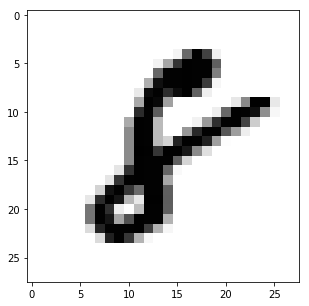

In [14]:
i=random.randint(0,54999)
fig=plt.figure(figsize=(5,5))
plt.imshow(mnist.train.images[i].reshape((28,28)),cmap=plt.get_cmap('binary'))
plt.show()

### Choosing hyperparametres

We are considering a neural network with one input, one hidden, and one output layers. Obviously, a number of input and output neurons must be equal to the number of inputs and outputs, respectively. Still, we have left with a question: "How many hidden neurons should we have?" Professionals suggest following formula:
$$N_{hid}=\frac{N_{data}}{\alpha (N_{inp}+N_{out})}$$
where $N_{data}$ is the number of x-y data pairs; $N_{inp}$, $N_{hid}$, $N_{out}$ - number of neurons in input, hidden, and output layers, respectively.

Parameter $\alpha$ should be between 2-10. If it's too high then a number of hidden neurons is too small, and a neural network has low "brain capacity", which means that it is going to be too hard to learn patterns in data. On the other hand, if $\alpha$ is too low neural network has more hidden neurons, more weights, and more flexibility. This can lead to an **overfitting**, which means that neural network "memorized" data so good that it becomes bad outside of training data.

To counter overfitting it is common practice to slice all data into training and testing. After finishing training neural network on training data, you can calculate loss on testing data and compare neural networks by this performance. Data is usually split in ratio 70-90/30-10, which is ratio training/testing data.

From this formula, we can calculate that optimal number of hidden layers is about 16-32. Using results, we are going to assign neural network with 784 input, 32 hidden, and 10 output neurons.

In [15]:
nn=net.NeuralNet(784,32,10,0.1)

### Actual training

You can remember that we are using gradient descent for updating weights in a neural network. This algorithm has one sensible parameter, which is called learning rate. If learning rate is too low, training is too slow. On the other hand, if it is too high, weight updates are chaotic or even exponentially unstable. For our uses, the optimal value can be found from the experiment. In reality, finding all hyperparameters is a hot topic in machine learning, which can be solved using machine learning itself!

For current data and neural network, I am using learning rate $\eta=0.1$. Maybe you can find a better value! 

In [18]:
loss_list=[] 
#each 100 iterations we print out loss for single x-y example
#Usually, it's better to calculate mean loss, because whole process is stohastic.
#However, this can be computationally expensive.

In [32]:
t0=time.time() #tracking down time of a training
for i in range(10000):
    t=random.randint(0,len(mnist.train.images)-1) #choosing random image from the database
    if (i%100==0):
        print(i)
        prediction=np.array(nn.y(mnist.train.images[t]))
        real=mnist.train.labels[t]
        loss=0.5*np.sum((prediction-real)**2) #calculating loss
        loss_list.append(loss)
        print(prediction)
        print(real)
        print(loss)
        
    x_train=[mnist.train.images[t]] #creating x,y data
    y_train=[mnist.train.labels[t]]
    nn.train(x_train,y_train,0.1) #training
    
t1=time.time()
print(t1-t0)

0
[  1.50112657e-03   1.01999454e-03   6.57035145e-02   9.56526333e-01
   1.66354060e-03   2.75874705e-02   5.83659314e-05   2.77025069e-03
   3.49147614e-02   2.24472970e-04]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
0.00410040493377
100
[  5.72771196e-03   2.45061338e-03   4.55393812e-02   9.52557355e-05
   1.34081112e-02   1.06593618e-02   9.81943771e-01   6.22755670e-05
   1.75513526e-03   3.93574730e-04]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
0.00136766131247
200
[  3.29333290e-04   4.15749382e-03   4.60546831e-02   5.69114152e-03
   1.07991138e-01   5.17296469e-04   7.38092499e-05   8.19981591e-01
   1.65162773e-03   7.83304453e-03]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
0.0231519435158
300
[  2.80630979e-03   1.79501378e-03   8.72058020e-01   4.32748853e-03
   6.87712592e-02   4.86482971e-04   6.44944250e-02   3.79200127e-04
   1.65631993e-02   7.45620083e-04]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
0.0127816338776
400
[  4.83175109e-04   9.28247810e-01   1.47378236e-02 

3500
[  3.03287302e-05   9.71885681e-01   6.07473929e-03   2.17902107e-02
   1.46791330e-04   4.35375969e-03   4.61183899e-03   7.33099884e-03
   1.29011815e-02   3.23674469e-03]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
0.000786518976256
3600
[  2.72193227e-04   8.98767826e-05   1.13663223e-03   6.19556449e-04
   9.72981264e-01   8.82231490e-03   5.56612149e-03   3.54710876e-03
   5.17544992e-02   3.56082303e-02]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
0.00239982061526
3700
[  1.27243039e-04   5.34109191e-03   1.32808487e-03   1.53344996e-03
   5.58490371e-02   4.08846703e-02   9.78574896e-03   1.09915422e-03
   9.78843315e-01   3.44503555e-03]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
0.00268988627725
3800
[  6.73630019e-04   9.58635654e-05   6.89724432e-04   3.89873828e-05
   9.46746913e-01   2.66334162e-02   7.62287360e-03   3.24584218e-02
   3.29832551e-02   4.29441691e-02]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
0.00379496221645
3900
[  1.24197689e-04   5.78053435e-02   1.255

7000
[  2.43470912e-04   1.22956282e-02   2.83556770e-05   5.43433938e-02
   1.94740084e-01   9.55192712e-03   1.13823131e-03   1.13526885e-01
   1.35693982e-02   3.84418658e-01]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
0.406245350628
7100
[  8.88651977e-01   2.65633242e-05   3.80937349e-02   1.19444325e-02
   2.38510799e-04   5.03560992e-02   4.77223069e-02   5.02281803e-03
   1.81428029e-02   3.43842062e-03]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.00958580493801
7200
[  5.85822466e-04   6.46298241e-04   2.82559823e-05   1.60032174e-03
   4.55115686e-02   1.36992691e-02   7.24259222e-04   4.50848192e-02
   1.16104526e-02   9.25751038e-01]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
0.00497158603209
7300
[  8.66505269e-05   2.17648539e-03   3.12877135e-04   1.34522478e-02
   3.23337125e-02   3.31755538e-03   1.07177196e-04   9.34026926e-02
   1.26409640e-02   7.96253065e-01]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
0.0258194812718
7400
[  2.06092260e-04   2.89998409e-04   2.9653185

In [63]:
#you can get a loss plot
plt.plot(loss_list)
plt.show()

After running this code 4 consecutive times, we have trained a neural network for an hour and gotten sufficient results. Now we can check results by showing image and printing calculated result:

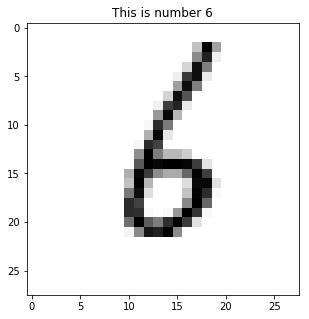

In [47]:
i=random.randint(0,54999)
fig=plt.figure(figsize=(5,5))
plt.imshow(mnist.train.images[i].reshape((28,28)),cmap=plt.get_cmap('binary'))
digit=np.argmax(nn.y(mnist.train.images[i])) #argmax chooses max value of calculated y-value
plt.title('This is number {0}'.format(digit))
plt.show()

### Saving results

After shutting down Jupyter notebook, values of all variables are lost. Considering that training can last for hours and days, we need to find a way of preserving results. Neural network's behavior is determined by its hyperparameters and weights. Hyperparameters are easy to remember but weights can be huge tables, which are hard for printing out. For example, the current neural network consists out of 25408 weights and this number can be much bigger.

Luckily, we can use library pickle which can dump pretty much each object into a binary code and then extract this object from a file with .p extension.

In [34]:
#We are gathering both table of weights into one dictionary and dump it into .p file
model_1={}
model_1['wa']=nn.wa
model_1['wb']=nn.wb
pickle.dump(model_1,open("model_1.p", "wb"))

For example, after reopening Jupyter notebook, we can load a dictionary of table weights using following code:

In [16]:
model_1=pickle.load(open("model_1.p","rb"))

Now we can assign already trained weights to a new neural network:

In [17]:
nn.wa=model_1['wa']
nn.wb=model_1['wb']

## Keras

Understanding how backpropagation works for feedforward neural network can already be quite a challenge. The complexity of architecture is going to only increase, which makes computing gradients even harder. That is why we are not going to manually derive formulas and later implement them in Python. Instead, we are going to explore how data propagates forward and trust backpropagation calculation to already created libraries.

The first library, which we are going to use is Keras because it has one of the simplest syntaxes and is perfectly suited for beginners in machine learning.

Speed is one more advantage of Keras over our Python library. Keras is build upon Tensorflow, which uses numpy, which uses special algorithms encoded in C/C++ for actions with weight tables. 

### Feedforward neural network in Keras

The most basic model in Keras is Sequential, which consists of linearly stacked layers. In other words, data travels through each layer of neurons once in one direction. Feedforward neural network perfectly fits for this model, and it consists from similar layers which are called Dense in Keras (because each neuron of the previous layer is connected with each neuron of the next layer).

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() #we begin stack layers like pancakes
model.add(Dense(32, input_dim=784, activation="sigmoid")) #input-hidden connection
model.add(Dense(10, activation="sigmoid")) #hidden-output connection

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) #we define loss + algorithm of descent
model.fit(mnist.train.images,mnist.train.labels,epochs=200,batch_size=128) 
#epoch - number of iteratons over whole data
#neural net takes batch_size of examples, calculates average gardient and applies it
#in class NeuralNet batch_size is always 1

Epoch 1/200
55000/55000 [==============================] - 2s 42us/step - loss: 0.2022 - acc: 0.1120
Epoch 2/200
55000/55000 [==============================] - 2s 28us/step - loss: 0.1257 - acc: 0.1231
Epoch 3/200
55000/55000 [==============================] - 2s 28us/step - loss: 0.1042 - acc: 0.1487
Epoch 4/200
55000/55000 [==============================] - 2s 28us/step - loss: 0.0968 - acc: 0.1798
Epoch 5/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.0934 - acc: 0.1982
Epoch 6/200
55000/55000 [==============================] - 2s 27us/step - loss: 0.0916 - acc: 0.2207
Epoch 7/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.0905 - acc: 0.2502
Epoch 8/200
55000/55000 [==============================] - 2s 28us/step - loss: 0.0898 - acc: 0.2784
Epoch 9/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.0893 - acc: 0.3019
Epoch 10/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.0890 - a

55000/55000 [==============================] - 1s 26us/step - loss: 0.0718 - acc: 0.6206
Epoch 82/200
55000/55000 [==============================] - 1s 26us/step - loss: 0.0716 - acc: 0.6238
Epoch 83/200
55000/55000 [==============================] - 1s 26us/step - loss: 0.0713 - acc: 0.6269
Epoch 84/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.0710 - acc: 0.6303
Epoch 85/200
55000/55000 [==============================] - 2s 30us/step - loss: 0.0707 - acc: 0.6341
Epoch 86/200
55000/55000 [==============================] - 1s 27us/step - loss: 0.0704 - acc: 0.6372
Epoch 87/200
55000/55000 [==============================] - 2s 28us/step - loss: 0.0701 - acc: 0.6403
Epoch 88/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.0699 - acc: 0.6428
Epoch 89/200
55000/55000 [==============================] - 2s 31us/step - loss: 0.0696 - acc: 0.6460
Epoch 90/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.0693 - acc: 

55000/55000 [==============================] - 1s 27us/step - loss: 0.0528 - acc: 0.7652
Epoch 161/200
55000/55000 [==============================] - 1s 26us/step - loss: 0.0526 - acc: 0.7664
Epoch 162/200
55000/55000 [==============================] - 1s 26us/step - loss: 0.0524 - acc: 0.7671
Epoch 163/200
55000/55000 [==============================] - 1s 26us/step - loss: 0.0522 - acc: 0.7683
Epoch 164/200
55000/55000 [==============================] - 1s 26us/step - loss: 0.0520 - acc: 0.7691
Epoch 165/200
55000/55000 [==============================] - 1s 26us/step - loss: 0.0519 - acc: 0.7699
Epoch 166/200
55000/55000 [==============================] - 2s 27us/step - loss: 0.0517 - acc: 0.7707
Epoch 167/200
55000/55000 [==============================] - 2s 28us/step - loss: 0.0515 - acc: 0.7715
Epoch 168/200
55000/55000 [==============================] - 2s 28us/step - loss: 0.0513 - acc: 0.7727
Epoch 169/200
55000/55000 [==============================] - 2s 29us/step - loss: 0.051

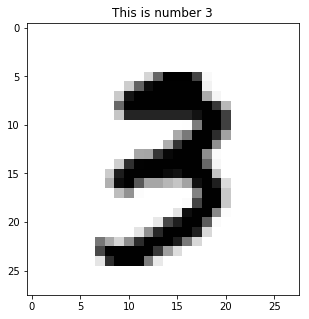

In [60]:
i=random.randint(0,54999)
fig=plt.figure(figsize=(5,5))
plt.imshow(mnist.train.images[i].reshape((28,28)),cmap=plt.get_cmap('binary'))
digit=np.argmax(model.predict(np.array([mnist.train.images[i]]))) #model.predict returns array of y predictions based on x values
plt.title('This is number {0}'.format(digit))
plt.show()

You can see that Keras has very simple syntax and if you learn most often used classes, you can very easily experiment with data and create individual projects. Finally, Keras models can be saved in HDF5 files as follows:

In [35]:
from keras.models import load_model

model.save('keras_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('keras_model.h5')

## Useful links

1. https://keras.io

## Homework

1. Object mnist contains also mnist.test.images and mnist.test.labels, which are 10000 x-y pairs. Train neural nets with different numbers of hidden neurons. How changes loss on train data and on test data? Try doing this task in both bold Python and Keras.
2. Find or gather yourself enough labeled data (which consists from x-y pairs), build neural network and train it using tips you have learned during this lecture.